# Creating an MNIST model

For this project we will require the following packages:
 - torch
 - torchvision
 - matplotlib

The packages can be downloaded from the requirements.txt
```
pip install -r requirements.txt
```

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Downloading the model

First we start by downloading the MNIST dataset, `torchvision` has a build in `dataset` object to install the MNIST dataset. After downloading the dataset we can use the `DataLoader` object to obtain iterables for the datasets.

In [2]:
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

training_data = datasets.MNIST('datasets', download=True, transform=ToTensor())
testing_data = datasets.MNIST('datasets', train=False, transform=ToTensor())

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(testing_data, batch_size=64)

1.7%

100.0%


Extracting datasets\MNIST\raw\train-images-idx3-ubyte.gz to datasets\MNIST\raw


100.0%


Extracting datasets\MNIST\raw\train-labels-idx1-ubyte.gz to datasets\MNIST\raw




13.9%

100.0%
100.0%


Extracting datasets\MNIST\raw\t10k-images-idx3-ubyte.gz to datasets\MNIST\raw

Extracting datasets\MNIST\raw\t10k-labels-idx1-ubyte.gz to datasets\MNIST\raw



We can see the data downloaded successfully by viewing the training data dataset object and viewing one of the images. In future the dataset object will use the downloaded files.

In [3]:
training_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets
    Split: Train
    StandardTransform
Transform: ToTensor()

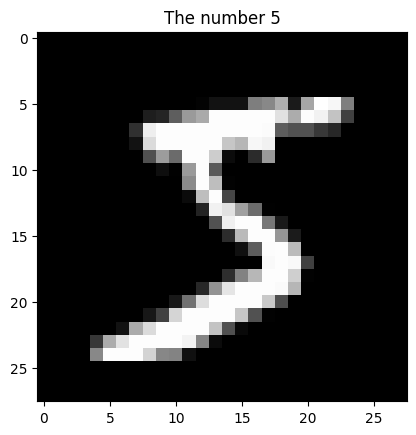

In [4]:
plt.imshow(training_data[0][0].squeeze(), cmap="gray")
plt.title(f'The number {training_data[0][1]}')
plt.show()

## Creating the model object

We can use the `torch.nn` module for all of our neural network functions. `nn.Module` is used as a base class for our neural network object.

In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 32),
            nn.ReLU(),
            nn.Linear(32, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Here we initiate the `NeuralNetwork` object and specify the device depending on whether or not cuda is available.

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = NeuralNetwork().to(device)

In [8]:
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=10, bias=True)
  )
)

## Training and testing the model

We start by specifying a loss function and an optimiser, and then create functions to carry out the training and testing and provide details into the progress.

In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [11]:
def train_data(model):
    for xb, yb in train_dataloader:
        preds = model(xb)
        loss = loss_fn(preds, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss = loss.item()
    print(f"Train loss: {loss:>7f}")

In [12]:
def test_data(model):
    num_batches = len(test_dataloader)
    size = len(test_dataloader.dataset)
    test_loss, corrects = 0, 0

    with torch.no_grad():
        for xb, yb in test_dataloader:
            preds = model(xb)
            test_loss += loss_fn(preds, yb).item()
            corrects += (preds.argmax(1) == yb).type(torch.float).sum().item()
    test_loss /= num_batches
    corrects /= size
    print(f'Test loss: {test_loss:>8f}')
    print(f'  Accuracy: {(100*corrects):>0.1f}%\n')

Now we can actually start training and testing the model, initially the model will have a very low accuracy which will be improved with training.

In [13]:
train_data(model)
test_data(model)

Train loss: 2.272223
Test loss: 2.276250
  Accuracy: 18.9%



We'll set it to repeat 60 times in hopes that the accuracy will improve.

In [14]:
for i in range(60):
    train_data(model)
    test_data(model)

Train loss: 2.231240
Test loss: 2.227819
  Accuracy: 40.1%

Train loss: 2.167623
Test loss: 2.155825
  Accuracy: 53.3%

Train loss: 2.065375
Test loss: 2.039607
  Accuracy: 62.0%

Train loss: 1.898310
Test loss: 1.852895
  Accuracy: 67.8%

Train loss: 1.657552
Test loss: 1.591688
  Accuracy: 71.8%

Train loss: 1.376801
Test loss: 1.306434
  Accuracy: 74.9%

Train loss: 1.116488
Test loss: 1.064832
  Accuracy: 77.6%

Train loss: 0.909331
Test loss: 0.889226
  Accuracy: 79.9%

Train loss: 0.751922
Test loss: 0.766921
  Accuracy: 81.6%

Train loss: 0.633505
Test loss: 0.680587
  Accuracy: 83.1%

Train loss: 0.544353
Test loss: 0.617711
  Accuracy: 84.2%

Train loss: 0.476676
Test loss: 0.570428
  Accuracy: 85.0%

Train loss: 0.424877
Test loss: 0.533831
  Accuracy: 85.5%

Train loss: 0.384717
Test loss: 0.504781
  Accuracy: 86.2%

Train loss: 0.353146
Test loss: 0.481171
  Accuracy: 86.7%

Train loss: 0.328013
Test loss: 0.461608
  Accuracy: 87.2%

Train loss: 0.307683
Test loss: 0.445120

In [15]:
for i in range(60):
    train_data(model)
    test_data(model)

Train loss: 0.104937
Test loss: 0.265599
  Accuracy: 92.2%

Train loss: 0.103453
Test loss: 0.263866
  Accuracy: 92.2%

Train loss: 0.102004
Test loss: 0.262156
  Accuracy: 92.3%

Train loss: 0.100599
Test loss: 0.260471
  Accuracy: 92.4%

Train loss: 0.099202
Test loss: 0.258803
  Accuracy: 92.5%

Train loss: 0.097812
Test loss: 0.257147
  Accuracy: 92.5%

Train loss: 0.096453
Test loss: 0.255504
  Accuracy: 92.6%

Train loss: 0.095131
Test loss: 0.253882
  Accuracy: 92.6%

Train loss: 0.093875
Test loss: 0.252279
  Accuracy: 92.7%

Train loss: 0.092639
Test loss: 0.250692
  Accuracy: 92.8%

Train loss: 0.091418
Test loss: 0.249119
  Accuracy: 92.8%

Train loss: 0.090247
Test loss: 0.247566
  Accuracy: 92.8%

Train loss: 0.089094
Test loss: 0.246023
  Accuracy: 92.8%

Train loss: 0.087943
Test loss: 0.244495
  Accuracy: 92.9%

Train loss: 0.086824
Test loss: 0.242982
  Accuracy: 93.0%

Train loss: 0.085694
Test loss: 0.241482
  Accuracy: 93.0%

Train loss: 0.084555
Test loss: 0.239992

## Saving the model

In [16]:
torch.save(model.state_dict(), 'mnist.pth')

## Opening the model

In [17]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load('mnist.pth'))
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [18]:
test_data(model)

Test loss: 0.186610
  Accuracy: 94.5%



## Using the model for predictions

The `mnist.py` file, when run, contains an interface which can be used to interact with the model. Left click for drawing and right clear to clear the display.